# Discussion 3: Introduction to inference with M&M's
Josh Grossman

<img src="img/mm.jpg" alt= “m&ms” width="100" /> <img src="img/mm.jpg" alt= “m&ms” width="100" /> <img src="img/mm.jpg" alt= “m&ms” width="100" /> <img src="img/mm.jpg" alt= “m&ms” width="100" /> <img src="img/mm.jpg" alt= “m&ms” width="100" /> <img src="img/mm.jpg" alt= “m&ms” width="100" />

Welcome to the third discussion of MS&E 125!

This discussion will proceed a little differently than previous discussion sections. If you join the discussion live, we'll be completing an in-class activity to generate (and eat!) our own data. If you're joining aynchronously, you'll be able to use synthetic (and inedible 🙁) data to complete the notebook.

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

## Introduction

Suppose M&M's bags are filled with candy by an unobserved machine. It might looks something like this:

<img src="img/factory.jpg" alt= “m&msfactory” width="300" />

As experienced candy-connoisseurs and budding data scientists, suppose we're interested in an important question:

- On average, what proportion of M&M's are blue?

In other words, we're interested in **inferring a property of an unobserved machine that randomly generates bags of M&Ms.** 

- If we designed the machine ourselves, then we wouldn't need the tools of statistical inference. We could just read off the setting for "proportion of candies that are blue".

- Instead, all we observe is a single bag of M&M's. 

If you've seen the [The Wizard of Oz](https://www.youtube.com/watch?v=ivRKfwmgrHY), you might draw an analogy to the unobserved man behind the curtain controlling what Dorothy et al. observe:

<img src="img/curtain.jpg" alt= “wizardofoz” width="300" />

This discussion will lead you through the process of turning a single bag of M&M's (the *sample*) into a statistical inference of the properties of an unobserved M&M's machine (the *population*, or the *data-generating process*). 

> At this point, it's natural to worry that filling bags with candy is totally unrelated to your future career prospects. However, this setup is surprisingly common in business settings. 
>
> For example, suppose you're a product manager who is interested in understanding your customer base. If we survey a random sample of customers, we can think of the opinions of the entire customer base as the properties unobserved M&M's machine, and the survey results as the observed bag of M&M's. 
>
> Same idea if you're a pollster trying to understand the fraction of all voters who identify as Republicans when all you observe is a small sample of voters.
>
> The methods taught in this notebook are used *constantly* by practitioners.

## 🍬 Generating the data

Once your bag of M&M's is in hand, **don't eat any!** Eating comes later.

**Before you eat any M&M's**, count the number of blue and not blue M&M's in your bag. 

- Use the code cell below to record your count.

- Enter your counts in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSeNrmsL6TE71Q3XgkVa6LOBCBi3mlkFfyW6IQ_-myC7rEIQNA/viewform?usp=sf_link)

- If you're joining asynchronously, set `n_blue = 8` and `n_not_blue = 48`.

In [26]:
n_blue = 0

n_not_blue = 0

# START solution

n_blue = 8

n_not_blue = 48

# END solution

## 🍽️ Interlude: Eating M&M's

After you have counted your M&M's, you can eat them.

Congratulations on making it through a very tedious counting exercise!

## ☝️ Point estimates

Our first objective is to provide a *point estimate*, or single best guess, of the *population* proportion of M&M's that are blue.

- This is a setting on the M&M's machine. Remember, **the settings are not observed by us!** If they were observed, we wouldn't need the tools of inference.

In the code cell below, provide a point estimate for the population proportion of M&M's that are blue. 

In [27]:
# Update the code below!

est_pop_prop_blue = None

# START solution

bag_size = n_blue + n_not_blue
est_pop_prop_blue = n_blue / bag_size

# END solution

## ❓ Uncertainty

Point estimates are often straightforward. For example, a sample statistic is often a very good estimate of a population statistic. 

Here's the problem: With only one bag of M&M's, how sure are you of your point estimate? 

- If you were instead given a different bag of M&M's, would you have had the same point estimate?

- If you were instead given a smaller bag of M&M's, would you be less confident of your point estimate? 

- If you were instead given a Costco-sized plastic tub of M&M's, would you be more confident of your point estimate? 

What's going on here is *counterfactual reasoning*. In statistical inference, we need to think about **what could have happened in a parallel universe**.

The (unobserved) distribution of point estimates across these parallel universes is called a *sampling distribution*. This idea powers inferential statistics!

## 👩‍🚀 Observing parallel universes?!

We're in an exciting scenario where we can actually *observe parallel universes* where other point estimates were generated. All of your neighbors have calculated their own point estimates!

> It's important to stress that **this is an unrealistic scenario**. We normally only see one sample of data. 

If we plot the point estimates from our neighbors, we can get an approximation of the theoretical sampling distribution.

**Exercise**: In the cell below, plot the distribution of your and your neighbor's point estimates for the proportion of M&M's that are blue.

In [ ]:
# Your code here!

# START solution

# import the point estimates from Github
# link will be posted after the discussion section
count_data = pd.read_csv(None)

count_data['est_pop_prop_blue'] = (
  count_data['n_blue'] / (count_data['n_blue'] + count_data['n_not_blue'])
)
# plot the sampling distribution for the proportion that are blue
sns.histplot(count_data['est_pop_prop_blue'])

# END solution

**Exercise**: Find the 2.5th and 97.5th quantiles of the sampling distribution.

- These values capture approximately 95% of the point estimates of our neighbors.

- These are known as 95% confidence intervals constructed via the percentile method.

- `np.quantile(x, [0.025, 0.975])` calculates the 2.5th and 97.5th percentiles of `x`.

In [ ]:
# Your code here!

# START solution

np.quantile(count_data['est_pop_prop_blue'], [0.025, 0.975])

# END solution

#### 🔔 The central limit theorem

Here's where things get spooky.

Coarsely, if an estimator involves a summation of random variables, and we sample a sufficient number of data points, then the sampling distribution of the estimator will approximate a normal distribution.

The sample proportion of blue M&M's (our *estimator*) has the following formula:

$$\frac{1}{N}\sum_{i = 1}^{N}X_i$$

$N$ is the number of M&M's in the bag, $x=1$ denotes a blue M&M, and $x=0$ denotes a not blue M&M.

Our *estimator* for the population proportion of M&M's that are blue is calculated by *summing up* all of the observed M&M's that are blue. If we also assume that the color of each M&M is randomly generated, then the central limit theorem is satisfied.

**Exercise**: Assume that the sampling distribution of the population proportion of M&M's that are blue is approximately normal.

- Calculate the standard deviation of the sampling distribution. This is known as the *standard error*.

- `np.std` may come in handy for calculating the standard error.

- Approximately 95% of the mass of a normal distribution falls between 1.96 standard deviations below the mean and 1.96 standard deviations above the mean. Calculate these bounds for the sampling distribution.

- This is known as a *95% confidence interval* constructed via the normal approximation.

- `np.mean` may also come in handy.

In [ ]:
# Your code here!

# START solution

m = np.mean(count_data['est_pop_prop_blue'])
se = np.std(count_data['est_pop_prop_blue'])
print([m-1.96*se, m+1.96*se])

# END solution

## 🥾 Constructing parallel universes via the bootstrap

As mentioned above, we typically do not observe parallel universes. So, what can we do to estimate the sampling distribution?

*The bootstrap* is a tool for constructing parallel universes using a single sample of data.

Here are the steps to the bootstrap method:

0. Collect a sample of data of size `n`.

1. Construct a synthetic sample of size `n` by resampling your data *with replacement*. In other words, after you draw a value from your real sample, *put it back* before drawing another value. 

2. With your resampled data set, calculate a synthetic point estimate.

3. Repeat steps 1 and 2 many times. 

4. Use the distribution of synthetic point estimates to approximate the sampling distribution of your estimator.

For example, suppose you want to estimate the fraction of days each year with rain. Here's how to generate a synthetic sampling distribution via the bootstrap, using a single year's worth of data:

0.0547945205479452


<AxesSubplot: ylabel='Count'>

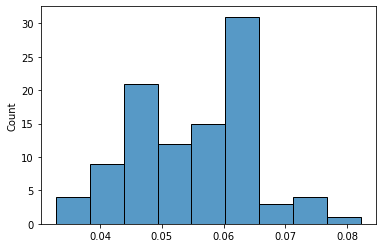

In [22]:
# sample of data for one year (365 days)
rainy_days = 20
prob_rain = rainy_days / 365
print(prob_rain)

# generate 100 synthetic years of data (and 100 synthetic point estimates)
synth_rainy_days = np.random.binomial(n=365, p=prob_rain, size=100) / 365

sns.histplot(synth_rainy_days)

Here's how to get a 95% confidence interval via the percentile method and the normal approximation:

In [23]:
# Percentile method
print(np.quantile(synth_rainy_days, [0.025, 0.975]))

# Normal approximation
se = np.std(synth_rainy_days)
print([prob_rain-2*se, prob_rain+2*se])

# Note that we use the real data for our 
# point estimate in the normal approximation.
# We only use the synthetic sampling distribution to estimate
# the standard error.

[0.03561644 0.07123288]
[0.03483584678727522, 0.07475319430861518]


In this case, both intervals are similar.

> Note that the bootstrap can be used for *any* estimator, not just those whose sampling distributions follow an approximate normal distribution. For example, you could use the bootstrap to estimate the Xth percentile of a data distribution.

**Exercise**: Using your bag of M&M's, do the following:

1. Randomly generate 1,000 synthetic bags of M&M's using the number of M&M's in your bag and the fraction of M&M's in your bag that are blue.

2. For each synthetic bag, calculate the fraction of M&M's that are blue.

3. Find the 2.5th and 97.5th quantiles of your synthetic sampling distribution. 

4. Use your synthetic sampling distribution to estimate the standard error of the sample proportion of M&M's that are blue. Using the synthetic standard error and the corresponding point estimate from the real data, construct a 95% confidence interval via the normal approximation.

5. How do the constructed intervals compare to each other, and to the class-wide interval?

In [28]:
# Your code here!

# START solution

# generate 1,0000 synthetic bags
synth_bags = np.random.binomial(n=bag_size, p=est_pop_prop_blue, size=1000)

# get the proportion of each bag with blue M&M's
synth_sampling_dist = synth_bags / bag_size

# percentile method
print(np.quantile(synth_sampling_dist, [0.025, 0.975]))

# normal approximation
m = np.mean(synth_sampling_dist)
se = np.std(synth_sampling_dist)
print([m-1.96*se, m+1.96*se])

# The CIs from the percentile method and normal approximation are very similar!

# END solution

[0.05357143 0.23214286]
[0.051418443176088166, 0.23229584253819752]


## 📊 Constructing parallel universes via statistics

We can also compute the properties of our estimator $\hat{p}$ analytically,
without simulation. It's time for notation!

$p$: the *population* proportion of M&M's that are blue

$\hat{p}$: the *sample* proportion of M&M's that are blue

> When you see a $\hat{hat}$ on a variable, it usually means it's an estimate for the same variable without the hat.

Let's also assume that an M&M's color is a random variable $X$, where each $X_i$ is generated i.i.d. (independently and identically) via a Bernoulli distribution with probability of success $p$. In other words,

$$ X \sim Bernoulli(p) $$

$x=1$ denotes a blue M&M, and $x=0$ denotes a not blue M&M.

As stated above, the sample proportion of blue M&M's $\hat{p}$ has the following formula:

$$\hat{p} = \frac{1}{N}\sum_{i = 1}^{N}X_i$$

From the [properties of a Bernoulli
distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) we know that

\begin{align*}
\mathbb{E}_p(X_i) & = p \\
\mathrm{Var}_p(X_i) & = p(1-p) \\
\end{align*}

where the subscript $_p$ in 
$\mathbb{E}_p$ and $\mathrm{Var}_p$ simply means that $p$ is fixed (i.e., it's _not_ random). 

> Remember, though, even though $p$ is fixed, it's unknown. Estimating $p$, the population proportion of M&M's that are blue, is the whole point of our inference! 

### 💭 The theoretical sampling distribution of $\hat{p}$

Suppose we use $\hat{p}$ to estimate $p$, as we've done above. 

1. What's the expected value of $\hat{p}$?

2. What's the variance of $\hat{p}$? Note that the variance of $\hat{p}$ is the square of its standard error.

Let's turn the statistical crank!

#### The expected value of $\hat{p}$

**Linearity of expectation** implies the following:

$$\mathbb{E} \left( \sum_{i=1}^n X_i \right) = \sum_{i=1}^n \mathbb{E}(X_i)$$

Thus,

\begin{align*}
\mathbb{E}_p(\hat{p}) & = \mathbb{E}_p\left(\frac{1}{N}\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N}\mathbb{E}_p\left(\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N}\sum_{i = 1}^{N}\mathbb{E}_p(X_i) \\
  & = \frac{1}{N}\sum_{i = 1}^{N}p \\
  & = \frac{1}{N}Np \\
  & = p
\end{align*}

The expected value of $\hat{p}$ is $p$.

$\hat{p}$ is therefore an *unbiased* estimator of $p$.

#### The variance of $\hat{p}$

If each $X_i$ is independently generated, then the following is true:

$$\mathrm{Var} \left( \sum_{i=1}^n X_i \right) = \sum_{i=1}^n \mathrm{Var}(X_i)$$

Thus,

\begin{align*}
\mathrm{Var}_p(\hat{p})
  & = \mathrm{Var}_p\left(\frac{1}{N}\sum_{i = 1}^{N}X_i\right) \\
  & = \frac{1}{N^2}\sum_{i = 1}^{N}\mathrm{Var}_p(X_i) \\
  & = \frac{1}{N^2}Np(1-p) \\
  & = \frac{p(1-p)}{N}
\end{align*}

and the standard error is:

$$\sqrt{\mathrm{Var}_p(\hat{p})} = \sqrt{\frac{p(1-p)}{N}}$$

If we don't know $p$, how can we calculate the variance of $\hat{p}$? 

We have to estimate $p$ using our point estimate, $\hat{p}$.

The estimated variance of $\hat{p}$ is $\frac{\hat{p}(1-\hat{p})}{n}$, and the estimated standard error is $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$.

### 🧑‍🤝‍🧑 Putting it all together

**Exercise**: Using your M&M's data and the formula for the estimated standard error of $\hat{p}$, use the normal approximation to construct a 95% confidence interval for $p$. 

- This is the 95% theoretical normal confidence interval for $p$.

- `np.sqrt` may come in handy

- How does the interval compare to the intervals calculated above?

In [20]:
# Your code here!

# START solution

se = np.sqrt(est_pop_prop_blue*(1-est_pop_prop_blue)/bag_size)
print([est_pop_prop_blue-1.96*se, est_pop_prop_blue+1.96*se])

# The interval is almost identical to the ones calculated above!

# END solution

[0.05120562895802605, 0.23450865675625965]
